In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import log_loss
from tensorflow.keras.utils import to_categorical
from sklearn.mixture import GaussianMixture

2024-05-07 02:06:05.968051: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 02:06:06.016822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 02:06:06.996331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

# use the train_img as the whole dataset
# X_a, y_a are the 70% sample A of the whole data
# X_b, y_b are the 30% sample B of the whole data for testing
X_a, X_b, y_a, y_b = train_test_split(train_img, train_lab, test_size = 0.3, random_state=42)

In [15]:
print(X_a.shape, X_b.shape, y_a.shape, y_b.shape)

(42000, 28, 28) (18000, 28, 28) (42000,) (18000,)


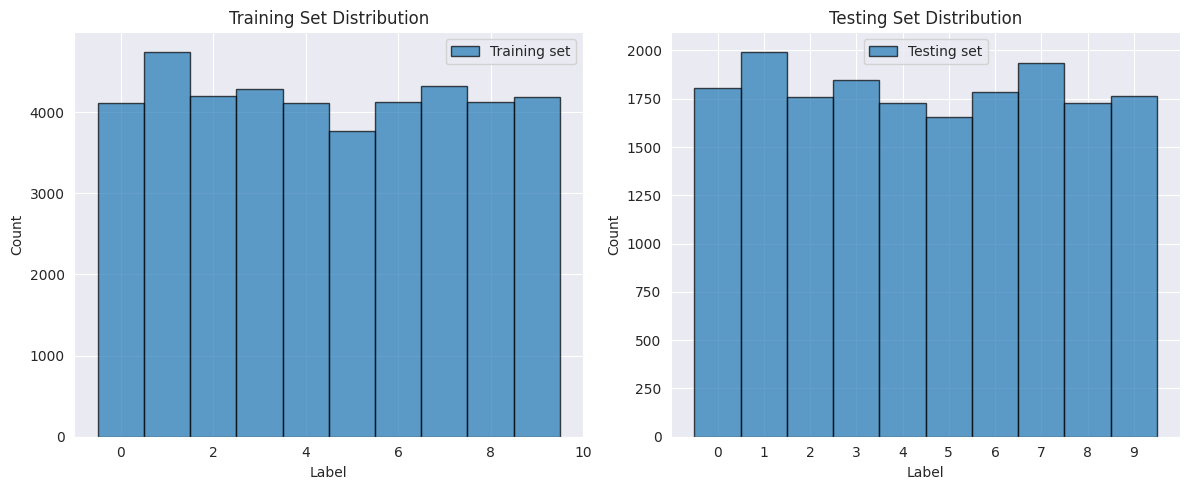

In [16]:
# distribution of labels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(y_a, bins=np.arange(0, 11)-0.5, alpha=0.7, label='Training set', edgecolor='black')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Training Set Distribution')
axes[0].legend()

axes[1].hist(y_b, bins=np.arange(0, 11)-0.5, alpha=0.7, label='Testing set', edgecolor='black')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].set_title('Testing Set Distribution')
axes[1].legend()

plt.xticks(range(10))
plt.tight_layout()
plt.show()

random sampling   
70% of dataset A for training, dataset B for testing

In [18]:
X_train_trad, _, y_train_trad, _ = train_test_split(X_a, y_a, test_size = 0.3)
print(X_train_trad.shape, y_train_trad.shape)

X_b_reshape = X_b.reshape(X_b.shape[0], 28, 28, 1)
# Normalize the pixel values
X_b_normalize = X_b_reshape.astype('float32') / 255

(29400, 28, 28) (29400,)


In [7]:
trad_loss = []
X_b_reshape = X_b.reshape(X_b.shape[0], 28, 28, 1)
X_b_normalize = X_b_reshape.astype('float32') / 255

for i in range(10):
    X_train_trad, _, y_train_trad, _ = train_test_split(X_a, y_a, test_size = 0.3)
    X_train_trad_reshape = X_train_trad.reshape(X_train_trad.shape[0], 28, 28, 1)
    X_train_trad_normalize = X_train_trad_reshape.astype('float32') / 255
    
    trad_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    trad_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    trad_model.fit(X_train_trad_normalize, y_train_trad, epochs=5, batch_size=64,  verbose=0)
    test_loss, _ = trad_model.evaluate(X_b_normalize, y_b)
    trad_loss.append(test_loss)
    print('Test loss:', test_loss)

2024-05-07 02:06:50.257821: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-07 02:06:50.298906: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9819 - loss: 0.0697
Test loss: 0.06740400195121765
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9845 - loss: 0.0553
Test loss: 0.054460883140563965
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9850 - loss: 0.0593
Test loss: 0.05740877985954285
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0574
Test loss: 0.05910325050354004
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0553
Test loss: 0.054774992167949677
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9848 - loss: 0.0551
Test loss: 0.05221908539533615
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0473
Test loss: 0.04979890212416649
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0438
Test loss: 0.047624096274375916
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9848 - loss: 0.0541
Test loss: 0.05784308537840843
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - 

In [9]:
print('Average test loss: ', np.mean(trad_loss))

Average test loss:  0.05679975152015686


## Cluster

cluster dataset A to get 70% of the data, use B for testing

In [19]:
def cluster(cluster_num, data, label, prop):
    '''
    use k-means to cluster data and return a set with the given size
    '''
    # Flatten data for K-means
    data_flattened = data.reshape(data.shape[0], -1)
    
    kmeans = KMeans(n_clusters=cluster_num, random_state=42).fit(data_flattened)
    clusters = kmeans.labels_

    # Create sample by sampling within each cluster
    sample = []
    sample_labels = []

    for idx in range(cluster_num):
        indices = np.where(clusters == idx)[0]
        # Sample indices
        sampled_indices = np.random.choice(indices, size=int(len(indices) * prop), replace=False)
        
        sample.append(data[sampled_indices])
        sample_labels.append(label[sampled_indices])
        
    # Concatenate all sampled data and labels
    sample = np.concatenate(sample, axis=0)
    sample_labels = np.concatenate(sample_labels, axis=0)

    return sample, sample_labels

In [20]:
X_clu_2, y_clu_2 = cluster(2, X_a, y_a, 0.7)
print(X_clu_2.shape, y_clu_2.shape)

(29399, 28, 28) (29399,)


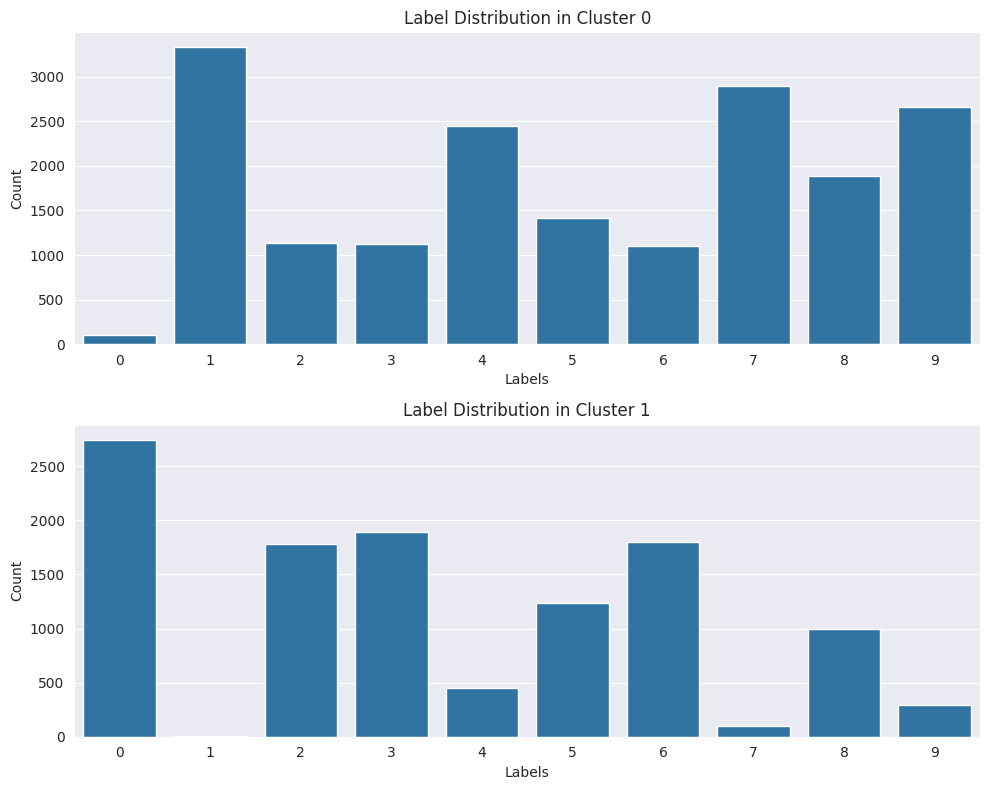

In [20]:
# check label distribution within each cluster
data_flattened = X_a.reshape(X_a.shape[0], -1)

kmeans = KMeans(n_clusters=2, random_state=42).fit(data_flattened)
clusters = kmeans.labels_

cluster_num = 2
fig, axes = plt.subplots(cluster_num, 1, figsize=(10, 8))

for idx in range(cluster_num):
    indices = np.where(clusters == idx)[0]
    # Sample indices
    sampled_indices = np.random.choice(indices, size=int(len(indices) * 0.7), replace=False)
    sample_labels=y_a[sampled_indices]
    
    # Plotting the label distribution for the current cluster
    sns.countplot(x=sample_labels, ax=axes[idx])
    axes[idx].set_title(f'Label Distribution in Cluster {idx}')
    axes[idx].set_xlabel('Labels')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

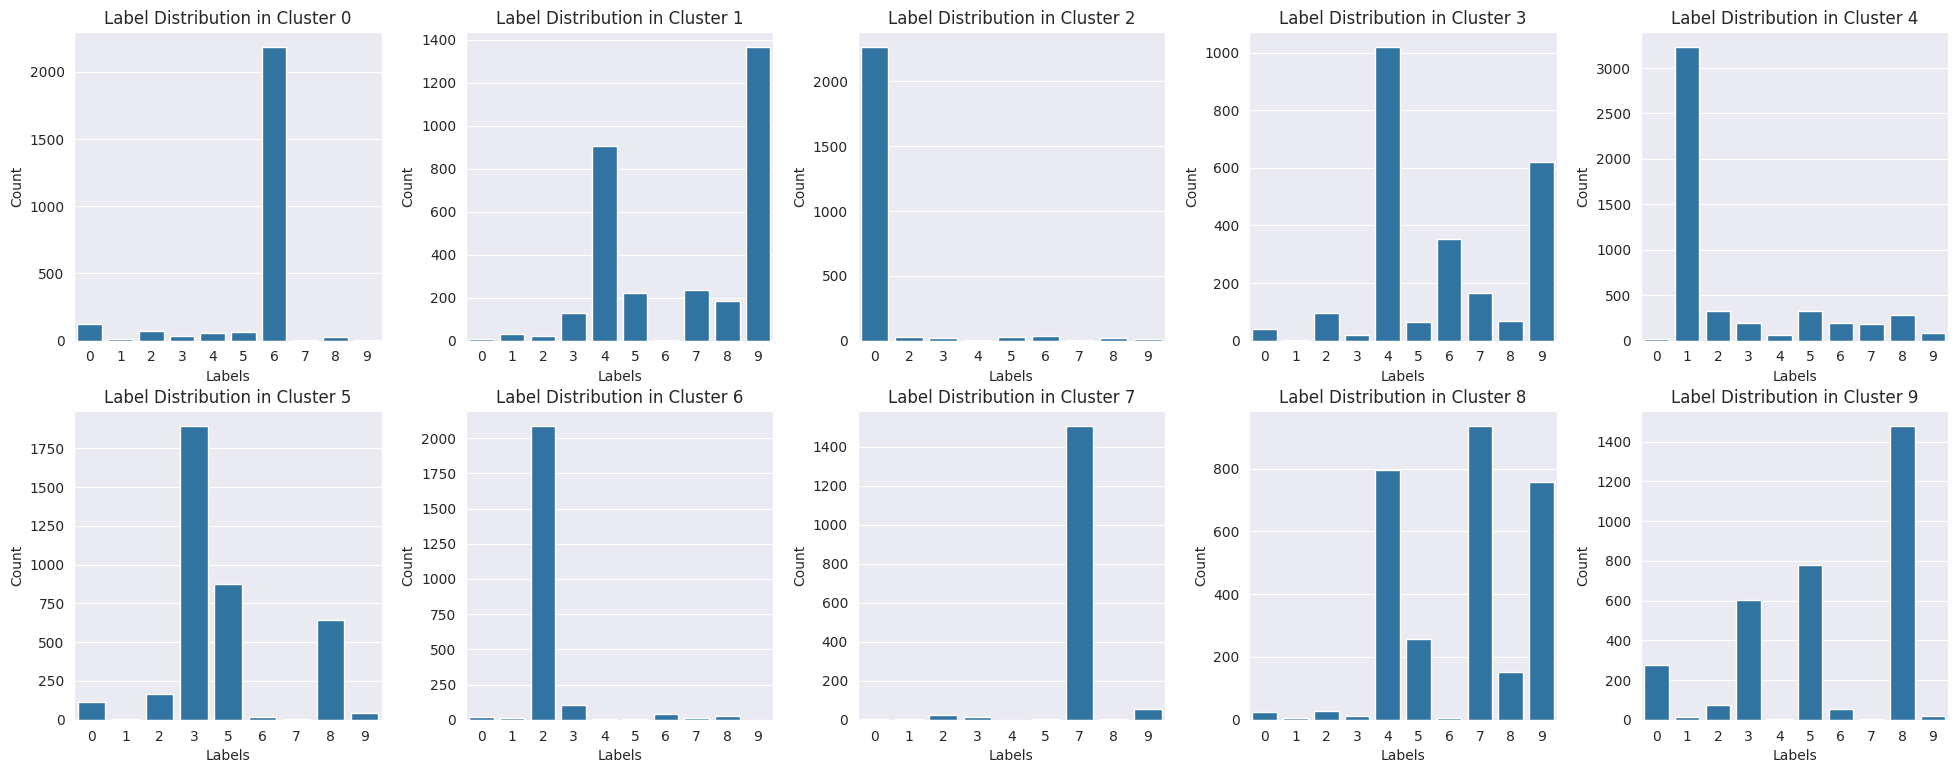

In [44]:
data_flattened = X_a.reshape(X_a.shape[0], -1)

kmeans = KMeans(n_clusters=10, random_state=42).fit(data_flattened)
clusters = kmeans.labels_

cluster_num = 10
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,8))
fig.tight_layout(pad=3.0)

for idx in range(cluster_num):
    indices = np.where(clusters == idx)[0]
    # Sample indices
    sampled_indices = np.random.choice(indices, size=int(len(indices) * 0.7), replace=False)
    sample_labels=y_a[sampled_indices]
    
    row = idx // num_cols
    col = idx % num_cols
    
    # Plotting the label distribution for the current cluster
    sns.countplot(x=sample_labels, ax=axes[row, col])
    axes[row, col].set_title(f'Label Distribution in Cluster {idx}')
    axes[row, col].set_xlabel('Labels')
    axes[row, col].set_ylabel('Count')

plt.show()

In [21]:
clu_loss = []

for i in range(10):
    X_clu_2, y_clu_2 = cluster(2, X_a, y_a, 0.7)
    X_clu_2_cnn = X_clu_2.reshape(X_clu_2.shape[0], 28, 28, 1).astype('float32') / 255

    clu_2_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    clu_2_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    clu_2_model.fit(X_clu_2_cnn, y_clu_2, epochs=5, batch_size=64, verbose=0)
    
    test_loss, _ = clu_2_model.evaluate(X_b_normalize, y_b)
    clu_loss.append(test_loss)

average_loss_clu_2 = np.mean(clu_loss)
print(f'\nAverage Test Loss over 10 runs: {average_loss_clu_2}')

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0506
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0620
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9836 - loss: 0.0532
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0550
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9854 - loss: 0.0517
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0536
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0565
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9863 - loss: 0.0504
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9843 - loss: 0.0572
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9853 - loss: 0.0548

Average Test Loss over 10 runs: 0.054436425864696505


2-10 clusters

In [12]:
losses_per_run = {i: [] for i in range(2, 11)}

for run in range(10):
    print(f'Run {run + 1}/10')
    for cluster_num in range(2, 11):
        X_clu, y_clu = cluster(cluster_num, X_a, y_a, 0.7)
        X_clu_cnn = X_clu.reshape(X_clu.shape[0], 28, 28, 1).astype('float32') / 255
    
        clu_model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        clu_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        clu_model.fit(X_clu_cnn, y_clu, epochs=5, batch_size=64, verbose=0)
        
        # calculate cross entropy on test set
        test_loss, _ = clu_model.evaluate(X_b_normalize, y_b)
        losses_per_run[cluster_num].append(test_loss)

Run 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0640
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9816 - loss: 0.0656
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0685
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0510
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0572
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9850 - loss: 0.0478
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0502
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9836 - loss: 0.0550
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0499
Run 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9831 - loss: 0.0609
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0490
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9857 - loss: 0.0536
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9869 - loss: 0.0481
563/563

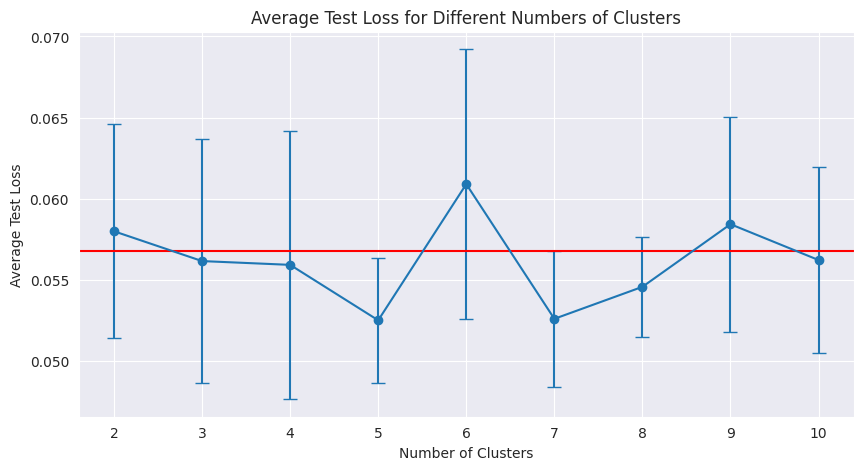

In [13]:
mean_losses = []
std_losses = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses.append(np.mean(losses_per_run[num]))
    std_losses.append(np.std(losses_per_run[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses, yerr=std_losses, fmt='-o', capsize=5, label='Clustering')
average_loss_trad = np.mean(trad_loss)
plt.axhline(y=average_loss_trad, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

# unbalanced dataset

95% of '1' go to training set A and 5% of '1' go to test set B   

5% of '7' go to training set A and 95% of '7' go to test set B

In [30]:
# Initialize lists for the custom split
X_a, X_b, y_a, y_b = [], [], [], []

# Process label 1
mask_label_1 = train_lab == 1
images_label_1 = train_img[mask_label_1]
labels_label_1 = train_lab[mask_label_1]

split_idx = int(0.95 * len(images_label_1))
X_a.extend(images_label_1[:split_idx])
y_a.extend(labels_label_1[:split_idx])
X_b.extend(images_label_1[split_idx:])
y_b.extend(labels_label_1[split_idx:])

# Process label 7
mask_label_7 = train_lab == 7
images_label_7 = train_img[mask_label_7]
labels_label_7 = train_lab[mask_label_7]

split_idx = int(0.05 * len(images_label_7))
X_a.extend(images_label_7[:split_idx])
y_a.extend(labels_label_7[:split_idx])
X_b.extend(images_label_7[split_idx:])
y_b.extend(labels_label_7[split_idx:])

# Process the rest of the labels
mask_rest = ~(mask_label_1 | mask_label_7)
images_rest = train_img[mask_rest]
labels_rest = train_lab[mask_rest]

X_a_rest, X_b_rest, y_a_rest, y_b_rest = train_test_split(
    images_rest, labels_rest, test_size=0.3, random_state=42
)

X_a.extend(X_a_rest)
y_a.extend(y_a_rest)
X_b.extend(X_b_rest)
y_b.extend(y_b_rest)

# Convert lists to numpy arrays
X_a, X_b = np.array(X_a), np.array(X_b)
y_a, y_b = np.array(y_a), np.array(y_b)

# Verify shapes
print(X_a.shape, y_a.shape, X_b.shape, y_b.shape)

(39612, 28, 28) (39612,) (20388, 28, 28) (20388,)


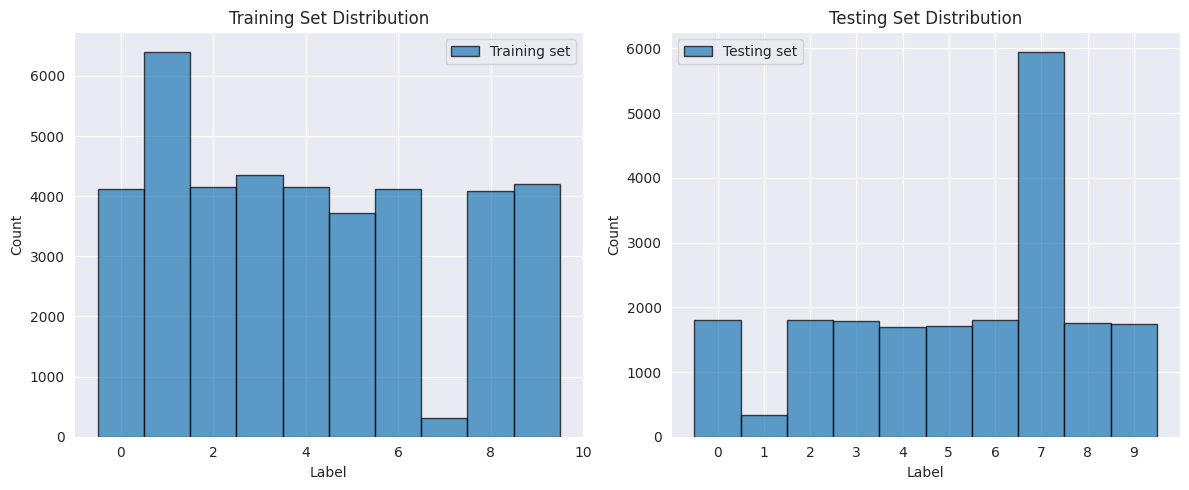

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(y_a, bins=np.arange(0, 11)-0.5, alpha=0.7, label='Training set', edgecolor='black')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Training Set Distribution')
axes[0].legend()

axes[1].hist(y_b, bins=np.arange(0, 11)-0.5, alpha=0.7, label='Testing set', edgecolor='black')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
axes[1].set_title('Testing Set Distribution')
axes[1].legend()

plt.xticks(range(10))
plt.tight_layout()
plt.show()

random splitting

In [32]:
X_train_trad, _, y_train_trad, _ = train_test_split(X_a, y_a, test_size = 0.3, random_state=42)
X_train_trad_reshape = X_train_trad.reshape(X_train_trad.shape[0], 28, 28, 1)
# Normalize the pixel values
X_train_trad_normalize = X_train_trad_reshape.astype('float32') / 255

X_b_reshape = X_b.reshape(X_b.shape[0], 28, 28, 1)
# Normalize the pixel values
X_b_normalize = X_b_reshape.astype('float32') / 255

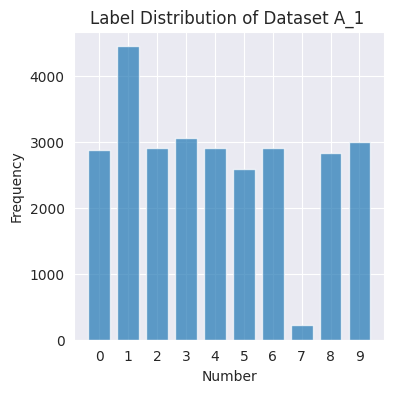

In [33]:
fig = plt.figure(figsize=(4, 4))

plt.hist(y_train_trad, bins=np.arange(-0.5, 10.5, 1), rwidth=0.75, alpha=0.7)
plt.title('Label Distribution of Dataset A_1 ')
plt.xticks(range(0,10))
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

In [34]:
trad_loss_unbalanced = []

for i in range(10):
    X_train_trad, _, y_train_trad, _ = train_test_split(X_a, y_a, test_size = 0.3)
    X_train_trad_reshape = X_train_trad.reshape(X_train_trad.shape[0], 28, 28, 1)
    X_train_trad_normalize = X_train_trad_reshape.astype('float32') / 255
    
    trad_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    trad_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    trad_model.fit(X_train_trad_normalize, y_train_trad, epochs=5, batch_size=64, verbose=0)
    
    test_loss, _ = trad_model.evaluate(X_b_normalize, y_b)
    trad_loss_unbalanced.append(test_loss)

average_loss_trad_unbalanced = np.mean(trad_loss_unbalanced)
print(f'\nAverage Test Loss over 10 runs: {average_loss_trad_unbalanced}')

638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.2132
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9283 - loss: 0.2528
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9204 - loss: 0.3128
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1640
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9399 - loss: 0.2215
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - loss: 0.1929
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9456 - loss: 0.1943
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9431 - loss: 0.1787
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9217 - loss: 0.2607
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9378 - loss: 0.1875

Average Test Loss over 10 runs: 0.13682451620697975


In [35]:
clu_loss_unbalanced = []

for i in range(10):
    X_clu_2, y_clu_2 = cluster(2, X_a, y_a, 0.7)
    X_clu_2_cnn = X_clu_2.reshape(X_clu_2.shape[0], 28, 28, 1).astype('float32') / 255

    clu_2_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    clu_2_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    clu_2_model.fit(X_clu_2_cnn, y_clu_2, epochs=5, batch_size=64,verbose=0)
    
    test_loss, _ = clu_2_model.evaluate(X_b_normalize, y_b)
    clu_loss_unbalanced.append(test_loss)

average_loss_clu_2 = np.mean(clu_loss_unbalanced)
print(f'\nAverage Test Loss over 10 runs: {average_loss_clu_2}')

638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9396 - loss: 0.2077
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9470 - loss: 0.1816
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9198 - loss: 0.2607
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9040 - loss: 0.3556
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9293 - loss: 0.2360
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9052 - loss: 0.3572
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9497 - loss: 0.1962
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9188 - loss: 0.2765
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9185 - loss: 0.2829
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9270 - loss: 0.2744

Average Test Loss over 10 runs: 0.1567867547273636


In [36]:
losses_per_run_unbalanced = {i: [] for i in range(2, 11)}

for run in range(10):
    print(f'Run {run + 1}/10')
    # Train model for cluster numbers from 2 to 10
    for cluster_num in range(2, 11):
        X_clu, y_clu = cluster(cluster_num, X_a, y_a, 0.7)
        X_clu_cnn = X_clu.reshape(X_clu.shape[0], 28, 28, 1).astype('float32') / 255
    
        clu_model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        
        clu_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        clu_model.fit(X_clu_cnn, y_clu, epochs=5, batch_size=64,verbose=0)
        
        test_loss, _ = clu_model.evaluate(X_b_normalize, y_b)
        losses_per_run_unbalanced[cluster_num].append(test_loss)

Run 1/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9271 - loss: 0.2529
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9569 - loss: 0.1525
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9346 - loss: 0.2193
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9261 - loss: 0.2469
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8870 - loss: 0.4207
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9236 - loss: 0.2444
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9011 - loss: 0.3528
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9309 - loss: 0.2401
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8977 - loss: 0.3390
Run 2/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9525 - loss: 0.1618
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9532 - loss: 0.1649
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9377 - loss: 0.2378
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9184 - loss: 0.2683
638/638

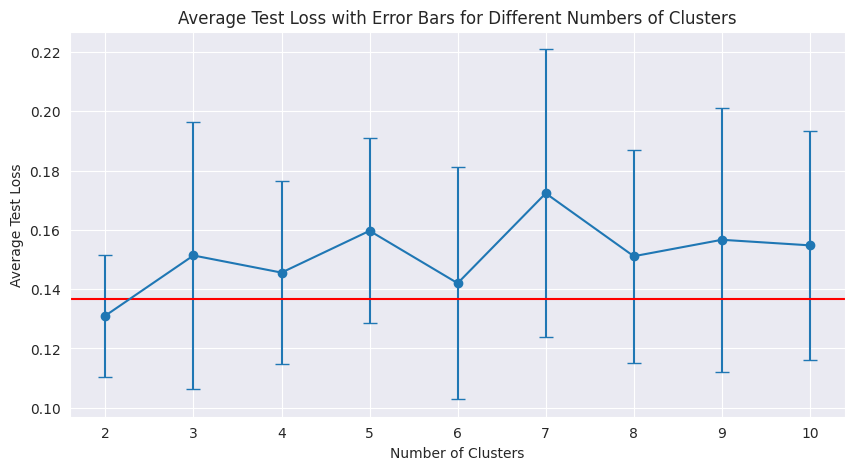

In [37]:
### rerun

mean_losses_unbalanced = []
std_losses_unbalanced = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses_unbalanced.append(np.mean(losses_per_run_unbalanced[num]))
    std_losses_unbalanced.append(np.std(losses_per_run_unbalanced[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses_unbalanced, yerr=std_losses_unbalanced, fmt='-o', capsize=5)
plt.axhline(y=average_loss_trad_unbalanced, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss with Error Bars for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

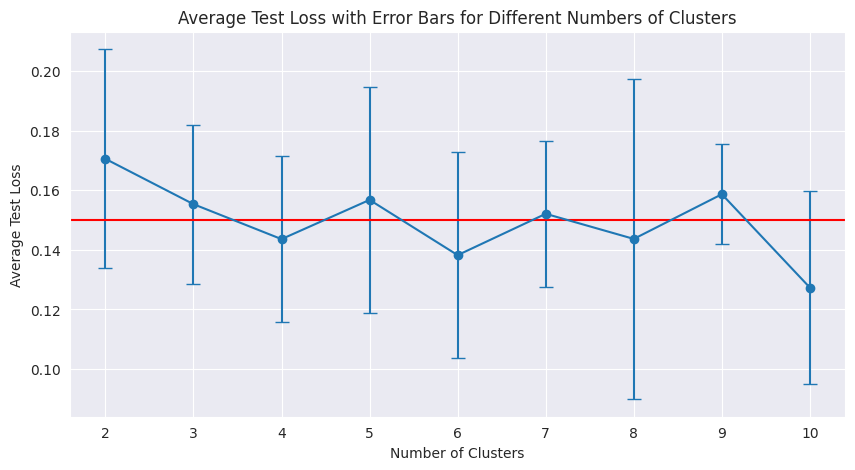

In [57]:
mean_losses_unbalanced = []
std_losses_unbalanced = []
cluster_nums = list(range(2, 11))
for num in cluster_nums:
    mean_losses_unbalanced.append(np.mean(losses_per_run_unbalanced[num]))
    std_losses_unbalanced.append(np.std(losses_per_run_unbalanced[num]))

# Plotting with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(cluster_nums, mean_losses_unbalanced, yerr=std_losses_unbalanced, fmt='-o', capsize=5)
plt.axhline(y=average_loss_trad_unbalanced, color='r', linestyle='-', label='Traditional Model')
plt.title('Average Test Loss with Error Bars for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Test Loss')
plt.grid(True)
plt.show()

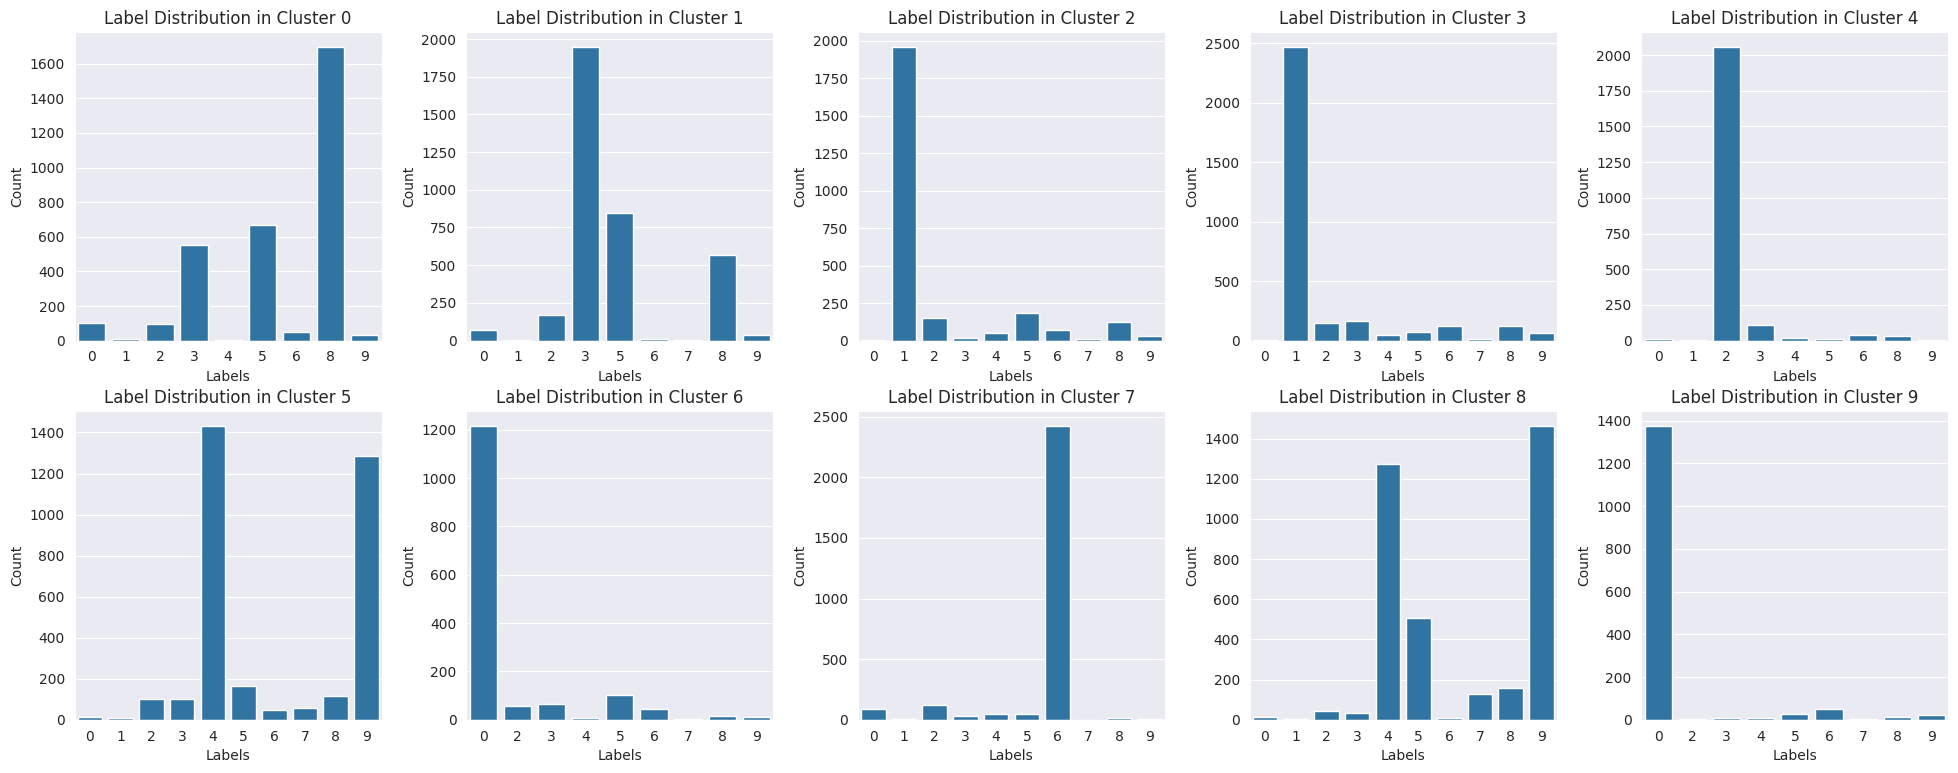

In [58]:
data_flattened = X_a.reshape(X_a.shape[0], -1)

kmeans = KMeans(n_clusters=10, random_state=42).fit(data_flattened)
clusters = kmeans.labels_

cluster_num = 10
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,8))
fig.tight_layout(pad=3.0)

for idx in range(cluster_num):
    indices = np.where(clusters == idx)[0]
    # Sample indices
    sampled_indices = np.random.choice(indices, size=int(len(indices) * 0.7), replace=False)
    sample_labels=y_a[sampled_indices]
    
    row = idx // num_cols
    col = idx % num_cols
    
    # Plotting the label distribution for the current cluster
    sns.countplot(x=sample_labels, ax=axes[row, col])
    axes[row, col].set_title(f'Label Distribution in Cluster {idx}')
    axes[row, col].set_xlabel('Labels')
    axes[row, col].set_ylabel('Count')

plt.show()